In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Reading Data set

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [3]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Join train Test data for preprocessing

In [7]:
train_df['train'] = 1

In [8]:
test_df['train'] = 0

In [9]:
dataset = pd.concat([train_df,test_df])

In [10]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train        1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


We have to predict survived and 891 entries are given 

Cabin contains only 295 entries out of 1309. So, we will drop this column

In [12]:
dataset.drop(columns=['Cabin','Ticket','Embarked'],inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
dataset.Sex = label_enc.fit_transform(dataset['Sex'])

In [14]:
dataset.drop(columns='PassengerId',inplace=True)

In [15]:
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,train
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,0
414,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,0
415,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0
416,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,0


## Let's Try Extracting the title from the name

In [16]:
def extract_title(name):
    start = name.find(',')
    end = name.find('.',start)
    
    title = name[start+1:end].strip()
    return title

In [17]:
extract_title('Futrelle, Mrs. Jacques Heath (Lily May Peel)')

'Mrs'

In [18]:
dataset['Title'] = dataset.Name.apply(extract_title)

In [19]:
dataset.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

### Lets classify the titles to make a better relation among them

In [20]:
dataset.Title = dataset.Title.replace(['Dona','Don','Jonkheer','the Countess','Sir','Lady','Rev'],'Elites')
dataset.Title = dataset.Title.replace(['Dr','Col','Major','Capt'],'Misc')
dataset.Title = dataset.Title.replace(['Mme'],'Miss')
dataset.Title = dataset.Title.replace(['Mlle'],'Mrs')
dataset.Title = dataset.Title.replace(['Ms'],'Miss')

In [21]:
dataset.Title.value_counts()

Mr        757
Miss      263
Mrs       199
Master     61
Misc       15
Elites     14
Name: Title, dtype: int64

In [22]:
dataset

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,train,Title
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,Mrs
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,Mr
...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,0,Mr
414,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,0,Elites
415,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0,Mr
416,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,0,Mr


## Now we don't need name any anymore as name itself can not provide much of the details

In [23]:
dataset.drop(columns='Name',inplace=True)

In [24]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,train,Title
0,0.0,3,1,22.0,1,0,7.2500,1,Mr
1,1.0,1,0,38.0,1,0,71.2833,1,Mrs
2,1.0,3,0,26.0,0,0,7.9250,1,Miss
3,1.0,1,0,35.0,1,0,53.1000,1,Mrs
4,0.0,3,1,35.0,0,0,8.0500,1,Mr
...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,NaN,0,0,8.0500,0,Mr
414,NaN,1,0,39.0,0,0,108.9000,0,Elites
415,NaN,3,1,38.5,0,0,7.2500,0,Mr
416,NaN,3,1,NaN,0,0,8.0500,0,Mr


## Now it's Timeto manage the catagorical data

In [25]:
catagorical_cols = ['Title']

In [26]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
labeled_dataset = dataset.copy()
for col in catagorical_cols:
    labeled_dataset[col] = label_enc.fit_transform(dataset[col])

In [27]:
labeled_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,train,Title
0,0.0,3,1,22.0,1,0,7.2500,1,4
1,1.0,1,0,38.0,1,0,71.2833,1,5
2,1.0,3,0,26.0,0,0,7.9250,1,3
3,1.0,1,0,35.0,1,0,53.1000,1,5
4,0.0,3,1,35.0,0,0,8.0500,1,4
...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,NaN,0,0,8.0500,0,4
414,NaN,1,0,39.0,0,0,108.9000,0,0
415,NaN,3,1,38.5,0,0,7.2500,0,4
416,NaN,3,1,NaN,0,0,8.0500,0,4


<AxesSubplot:>

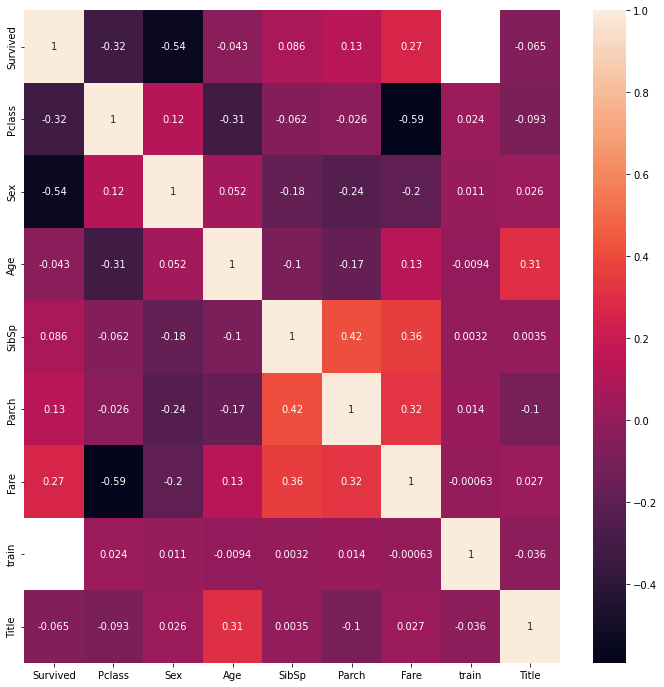

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(labeled_dataset.corr('kendall'),annot=True)

It seems that there exist almost no relation between Title and Survival. Let's try OneHot Encoding

In [29]:
OHencoded_dataset = pd.get_dummies(data=dataset,columns=catagorical_cols)

In [30]:
OHencoded_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,1,22.0,1,0,7.2500,1,0,0,0,0,1,0
1,1.0,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1
2,1.0,3,0,26.0,0,0,7.9250,1,0,0,0,1,0,0
3,1.0,1,0,35.0,1,0,53.1000,1,0,0,0,0,0,1
4,0.0,3,1,35.0,0,0,8.0500,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,NaN,0,0,8.0500,0,0,0,0,0,1,0
414,NaN,1,0,39.0,0,0,108.9000,0,1,0,0,0,0,0
415,NaN,3,1,38.5,0,0,7.2500,0,0,0,0,0,1,0
416,NaN,3,1,NaN,0,0,8.0500,0,0,0,0,0,1,0


<AxesSubplot:>

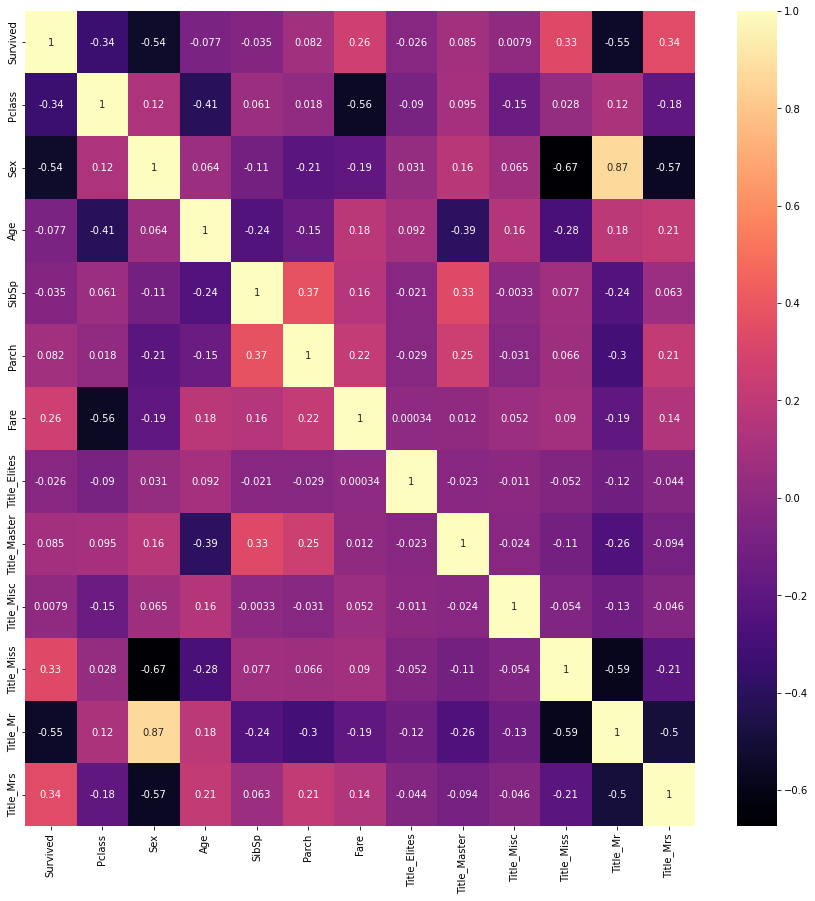

In [31]:
plt.figure(figsize=(15,15))

sns.heatmap(OHencoded_dataset.drop(columns='train').corr(),cmap='magma',annot=True)

Lets Creat a new a feature

In [32]:
OHencoded_dataset['Family_Size'] = OHencoded_dataset.SibSp + OHencoded_dataset.Parch +1

In [33]:
OHencoded_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
0,0.0,3,1,22.0,1,0,7.2500,1,0,0,0,0,1,0,2
1,1.0,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,2
2,1.0,3,0,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1.0,1,0,35.0,1,0,53.1000,1,0,0,0,0,0,1,2
4,0.0,3,1,35.0,0,0,8.0500,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,NaN,0,0,8.0500,0,0,0,0,0,1,0,1
414,NaN,1,0,39.0,0,0,108.9000,0,1,0,0,0,0,0,1
415,NaN,3,1,38.5,0,0,7.2500,0,0,0,0,0,1,0,1
416,NaN,3,1,NaN,0,0,8.0500,0,0,0,0,0,1,0,1


<AxesSubplot:>

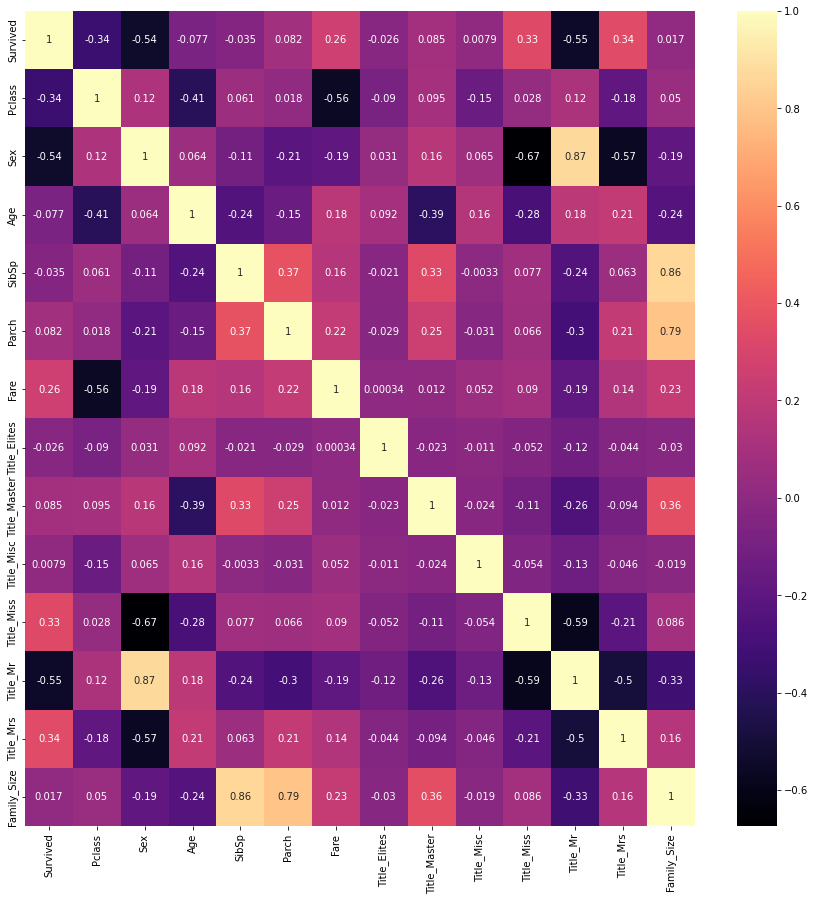

In [34]:
plt.figure(figsize=(15,15))

sns.heatmap(OHencoded_dataset.drop(columns='train').corr(),cmap='magma',annot=True)

In [35]:
len(OHencoded_dataset.columns)

15

In [36]:
OHencoded_dataset.drop(columns=['SibSp','Parch'],inplace=True)

In [37]:
OHencoded_dataset

,Survived,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
0,0.0,3,1,22.0,7.2500,1,0,0,0,0,1,0,2
1,1.0,1,0,38.0,71.2833,1,0,0,0,0,0,1,2
2,1.0,3,0,26.0,7.9250,1,0,0,0,1,0,0,1
3,1.0,1,0,35.0,53.1000,1,0,0,0,0,0,1,2
4,0.0,3,1,35.0,8.0500,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,NaN,8.0500,0,0,0,0,0,1,0,1
414,NaN,1,0,39.0,108.9000,0,1,0,0,0,0,0,1
415,NaN,3,1,38.5,7.2500,0,0,0,0,0,1,0,1
416,NaN,3,1,NaN,8.0500,0,0,0,0,0,1,0,1


In [38]:
age_train = OHencoded_dataset[OHencoded_dataset.Age.notna()]
age_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      714 non-null    float64
 1   Pclass        1046 non-null   int64  
 2   Sex           1046 non-null   int64  
 3   Age           1046 non-null   float64
 4   Fare          1045 non-null   float64
 5   train         1046 non-null   int64  
 6   Title_Elites  1046 non-null   uint8  
 7   Title_Master  1046 non-null   uint8  
 8   Title_Misc    1046 non-null   uint8  
 9   Title_Miss    1046 non-null   uint8  
 10  Title_Mr      1046 non-null   uint8  
 11  Title_Mrs     1046 non-null   uint8  
 12  Family_Size   1046 non-null   int64  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 71.5 KB


In [39]:
age_train.loc[age_train['Fare'].isna(),'Fare'] = np.mean(age_train.Fare)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [40]:
age_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      714 non-null    float64
 1   Pclass        1046 non-null   int64  
 2   Sex           1046 non-null   int64  
 3   Age           1046 non-null   float64
 4   Fare          1046 non-null   float64
 5   train         1046 non-null   int64  
 6   Title_Elites  1046 non-null   uint8  
 7   Title_Master  1046 non-null   uint8  
 8   Title_Misc    1046 non-null   uint8  
 9   Title_Miss    1046 non-null   uint8  
 10  Title_Mr      1046 non-null   uint8  
 11  Title_Mrs     1046 non-null   uint8  
 12  Family_Size   1046 non-null   int64  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 71.5 KB


In [41]:
age_pred = OHencoded_dataset[OHencoded_dataset.Age.isna()]
age_pred

,Survived,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
5,0.0,3,1,NaN,8.4583,1,0,0,0,0,1,0,1
17,1.0,2,1,NaN,13.0000,1,0,0,0,0,1,0,1
19,1.0,3,0,NaN,7.2250,1,0,0,0,0,0,1,1
26,0.0,3,1,NaN,7.2250,1,0,0,0,0,1,0,1
28,1.0,3,0,NaN,7.8792,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,NaN,3,0,NaN,7.7208,0,0,0,0,1,0,0,1
410,NaN,3,0,NaN,7.7500,0,0,0,0,1,0,0,1
413,NaN,3,1,NaN,8.0500,0,0,0,0,0,1,0,1
416,NaN,3,1,NaN,8.0500,0,0,0,0,0,1,0,1


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble      import RandomForestRegressor
from sklearn.pipeline      import Pipeline

scaler = StandardScaler()
pca = PCA()
model = RandomForestRegressor()
pipeline = Pipeline([('scaler',scaler),('pca',pca),('randomForest',model)])

In [43]:
age_train.drop(columns=['Survived','Age'])

,Pclass,Sex,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
0,3,1,7.2500,1,0,0,0,0,1,0,2
1,1,0,71.2833,1,0,0,0,0,0,1,2
2,3,0,7.9250,1,0,0,0,1,0,0,1
3,1,0,53.1000,1,0,0,0,0,0,1,2
4,3,1,8.0500,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
409,3,0,13.7750,0,0,0,0,1,0,0,3
411,1,0,90.0000,0,0,0,0,0,0,1,2
412,3,0,7.7750,0,0,0,0,1,0,0,1
414,1,0,108.9000,0,1,0,0,0,0,0,1


In [44]:
age_train

,Survived,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
0,0.0,3,1,22.0,7.2500,1,0,0,0,0,1,0,2
1,1.0,1,0,38.0,71.2833,1,0,0,0,0,0,1,2
2,1.0,3,0,26.0,7.9250,1,0,0,0,1,0,0,1
3,1.0,1,0,35.0,53.1000,1,0,0,0,0,0,1,2
4,0.0,3,1,35.0,8.0500,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,NaN,3,0,3.0,13.7750,0,0,0,0,1,0,0,3
411,NaN,1,0,37.0,90.0000,0,0,0,0,0,0,1,2
412,NaN,3,0,28.0,7.7750,0,0,0,0,1,0,0,1
414,NaN,1,0,39.0,108.9000,0,1,0,0,0,0,0,1


In [45]:
age_train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Age, Length: 1046, dtype: float64

In [46]:
pd.DataFrame(scaler.fit_transform(age_train.drop(columns=['Survived'])))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.942276,0.767897,-0.547050,-0.528673,0.681899,-0.116473,-0.231027,-0.116473,-0.504179,0.894620,-0.443617,0.052666
1,-1.435579,-1.302258,0.563552,0.621367,0.681899,-0.116473,-0.231027,-0.116473,-0.504179,-1.117794,2.254195,0.052666
2,0.942276,-1.302258,-0.269400,-0.516550,0.681899,-0.116473,-0.231027,-0.116473,1.983422,-1.117794,-0.443617,-0.635946
3,-1.435579,-1.302258,0.355314,0.294794,0.681899,-0.116473,-0.231027,-0.116473,-0.504179,-1.117794,2.254195,0.052666
4,0.942276,0.767897,0.355314,-0.514305,0.681899,-0.116473,-0.231027,-0.116473,-0.504179,0.894620,-0.443617,-0.635946
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0.942276,-1.302258,-1.865890,-0.411483,-1.466493,-0.116473,-0.231027,-0.116473,1.983422,-1.117794,-0.443617,0.741279
1042,-1.435579,-1.302258,0.494139,0.957519,-1.466493,-0.116473,-0.231027,-0.116473,-0.504179,-1.117794,2.254195,0.052666
1043,0.942276,-1.302258,-0.130575,-0.519244,-1.466493,-0.116473,-0.231027,-0.116473,1.983422,-1.117794,-0.443617,-0.635946
1044,-1.435579,-1.302258,0.632964,1.296963,-1.466493,8.585702,-0.231027,-0.116473,-0.504179,-1.117794,-0.443617,-0.635946


In [47]:
age_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      714 non-null    float64
 1   Pclass        1046 non-null   int64  
 2   Sex           1046 non-null   int64  
 3   Age           1046 non-null   float64
 4   Fare          1046 non-null   float64
 5   train         1046 non-null   int64  
 6   Title_Elites  1046 non-null   uint8  
 7   Title_Master  1046 non-null   uint8  
 8   Title_Misc    1046 non-null   uint8  
 9   Title_Miss    1046 non-null   uint8  
 10  Title_Mr      1046 non-null   uint8  
 11  Title_Mrs     1046 non-null   uint8  
 12  Family_Size   1046 non-null   int64  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 71.5 KB


In [48]:
age_train.drop(columns=['Survived','Age']).isna().any()

Pclass          False
Sex             False
Fare            False
train           False
Title_Elites    False
Title_Master    False
Title_Misc      False
Title_Miss      False
Title_Mr        False
Title_Mrs       False
Family_Size     False
dtype: bool

In [49]:
pipeline.fit(age_train.drop(columns=['Survived','Age']),age_train.Age)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('randomForest', RandomForestRegressor())])

In [50]:
age_predictions = pipeline.predict(age_pred.drop(columns=['Survived','Age']))

In [51]:
age_train

,Survived,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
0,0.0,3,1,22.0,7.2500,1,0,0,0,0,1,0,2
1,1.0,1,0,38.0,71.2833,1,0,0,0,0,0,1,2
2,1.0,3,0,26.0,7.9250,1,0,0,0,1,0,0,1
3,1.0,1,0,35.0,53.1000,1,0,0,0,0,0,1,2
4,0.0,3,1,35.0,8.0500,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,NaN,3,0,3.0,13.7750,0,0,0,0,1,0,0,3
411,NaN,1,0,37.0,90.0000,0,0,0,0,0,0,1,2
412,NaN,3,0,28.0,7.7750,0,0,0,0,1,0,0,1
414,NaN,1,0,39.0,108.9000,0,1,0,0,0,0,0,1


In [52]:
age_pred

,Survived,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
5,0.0,3,1,NaN,8.4583,1,0,0,0,0,1,0,1
17,1.0,2,1,NaN,13.0000,1,0,0,0,0,1,0,1
19,1.0,3,0,NaN,7.2250,1,0,0,0,0,0,1,1
26,0.0,3,1,NaN,7.2250,1,0,0,0,0,1,0,1
28,1.0,3,0,NaN,7.8792,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,NaN,3,0,NaN,7.7208,0,0,0,0,1,0,0,1
410,NaN,3,0,NaN,7.7500,0,0,0,0,1,0,0,1
413,NaN,3,1,NaN,8.0500,0,0,0,0,0,1,0,1
416,NaN,3,1,NaN,8.0500,0,0,0,0,0,1,0,1


In [53]:
age_pred['Age'] = age_predictions

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
age_pred

,Survived,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
5,0.0,3,1,23.891667,8.4583,1,0,0,0,0,1,0,1
17,1.0,2,1,31.398890,13.0000,1,0,0,0,0,1,0,1
19,1.0,3,0,38.748167,7.2250,1,0,0,0,0,0,1,1
26,0.0,3,1,32.993863,7.2250,1,0,0,0,0,1,0,1
28,1.0,3,0,21.528452,7.8792,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,NaN,3,0,22.338083,7.7208,0,0,0,0,1,0,0,1
410,NaN,3,0,29.926738,7.7500,0,0,0,0,1,0,0,1
413,NaN,3,1,26.609782,8.0500,0,0,0,0,0,1,0,1
416,NaN,3,1,26.609782,8.0500,0,0,0,0,0,1,0,1


In [55]:
age_pred.loc[:,'Age'] = np.round(age_pred.loc[:,'Age'])

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [56]:
age_pred

,Survived,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
5,0.0,3,1,24.0,8.4583,1,0,0,0,0,1,0,1
17,1.0,2,1,31.0,13.0000,1,0,0,0,0,1,0,1
19,1.0,3,0,39.0,7.2250,1,0,0,0,0,0,1,1
26,0.0,3,1,33.0,7.2250,1,0,0,0,0,1,0,1
28,1.0,3,0,22.0,7.8792,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,NaN,3,0,22.0,7.7208,0,0,0,0,1,0,0,1
410,NaN,3,0,30.0,7.7500,0,0,0,0,1,0,0,1
413,NaN,3,1,27.0,8.0500,0,0,0,0,0,1,0,1
416,NaN,3,1,27.0,8.0500,0,0,0,0,0,1,0,1


In [57]:
cleaned_data = pd.concat([age_train,age_pred])

In [58]:
cleaned_data

,Survived,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
0,0.0,3,1,22.0,7.2500,1,0,0,0,0,1,0,2
1,1.0,1,0,38.0,71.2833,1,0,0,0,0,0,1,2
2,1.0,3,0,26.0,7.9250,1,0,0,0,1,0,0,1
3,1.0,1,0,35.0,53.1000,1,0,0,0,0,0,1,2
4,0.0,3,1,35.0,8.0500,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,NaN,3,0,22.0,7.7208,0,0,0,0,1,0,0,1
410,NaN,3,0,30.0,7.7500,0,0,0,0,1,0,0,1
413,NaN,3,1,27.0,8.0500,0,0,0,0,0,1,0,1
416,NaN,3,1,27.0,8.0500,0,0,0,0,0,1,0,1


In [59]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Pclass        1309 non-null   int64  
 2   Sex           1309 non-null   int64  
 3   Age           1309 non-null   float64
 4   Fare          1309 non-null   float64
 5   train         1309 non-null   int64  
 6   Title_Elites  1309 non-null   uint8  
 7   Title_Master  1309 non-null   uint8  
 8   Title_Misc    1309 non-null   uint8  
 9   Title_Miss    1309 non-null   uint8  
 10  Title_Mr      1309 non-null   uint8  
 11  Title_Mrs     1309 non-null   uint8  
 12  Family_Size   1309 non-null   int64  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 89.5 KB


In [60]:
cleaned_data.describe()

,Survived,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,0.644003,29.694935,33.298070,0.680672,0.010695,0.046600,0.011459,0.200917,0.578304,0.152024,1.883881
std,0.486592,0.837836,0.478997,13.604321,51.738964,0.466394,0.102902,0.210862,0.106473,0.400839,0.494019,0.359182,1.583639
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,21.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,14.454200,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,37.000000,31.275000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


In [61]:
cleaned_train_data = cleaned_data[cleaned_data['train']==1].copy()

In [62]:
cleaned_train_data

,Survived,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
0,0.0,3,1,22.0,7.2500,1,0,0,0,0,1,0,2
1,1.0,1,0,38.0,71.2833,1,0,0,0,0,0,1,2
2,1.0,3,0,26.0,7.9250,1,0,0,0,1,0,0,1
3,1.0,1,0,35.0,53.1000,1,0,0,0,0,0,1,2
4,0.0,3,1,35.0,8.0500,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0.0,3,1,24.0,7.2292,1,0,0,0,0,1,0,1
863,0.0,3,0,25.0,69.5500,1,0,0,0,1,0,0,11
868,0.0,3,1,26.0,9.5000,1,0,0,0,0,1,0,1
878,0.0,3,1,28.0,7.8958,1,0,0,0,0,1,0,1


In [63]:
cleaned_test_data = cleaned_data[cleaned_data['train']==0].copy()

In [64]:
cleaned_test_data.drop(columns='Survived',inplace=True)

In [65]:
cleaned_test_data

,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size
0,3,1,34.5,7.8292,0,0,0,0,0,1,0,1
1,3,0,47.0,7.0000,0,0,0,0,0,0,1,2
2,2,1,62.0,9.6875,0,0,0,0,0,1,0,1
3,3,1,27.0,8.6625,0,0,0,0,0,1,0,1
4,3,0,22.0,12.2875,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
408,3,0,22.0,7.7208,0,0,0,0,1,0,0,1
410,3,0,30.0,7.7500,0,0,0,0,1,0,0,1
413,3,1,27.0,8.0500,0,0,0,0,0,1,0,1
416,3,1,27.0,8.0500,0,0,0,0,0,1,0,1


In [66]:
data_dim_reduction = PCA(0.99)
data_dim_reduction.fit(cleaned_train_data.drop(columns='Survived'),cleaned_train_data.Survived)

PCA(n_components=0.99)

In [67]:
data_dim_reduction.feature_names_in_

array(['Pclass', 'Sex', 'Age', 'Fare', 'train', 'Title_Elites',
       'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Family_Size'], dtype=object)

In [68]:
data_dim_reduction.explained_variance_ratio_

array([0.92811591, 0.07061608])

In [69]:
data_dim_reduction.components_

array([[-9.28821956e-03, -1.74264466e-03,  2.93327090e-02,
         9.99498353e-01,  0.00000000e+00, -1.33922083e-05,
         3.23953091e-05,  7.02912767e-05,  9.46872494e-04,
        -1.80620331e-03,  7.70036440e-04,  6.96910879e-03],
       [-2.06859658e-02,  5.04730214e-03,  9.98499073e-01,
        -2.91977645e-02, -0.00000000e+00,  8.42414563e-04,
        -6.00561029e-03,  1.35563918e-03, -9.52691834e-03,
         9.08922099e-03,  4.24525390e-03, -3.82582676e-02]])

In [70]:
reduced_clean_train_data = pd.DataFrame(data_dim_reduction.transform(cleaned_train_data.drop(columns='Survived')))

In [71]:
X = cleaned_train_data.drop(columns='Survived')
y = cleaned_train_data.Survived

In [72]:
from sklearn.model_selection import train_test_split

xt,xv,yt,yv = train_test_split(X,y,test_size=0.3,random_state=101)

## Creating a basline Model

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
baseModel = RandomForestClassifier()

In [75]:
baseModel.fit(xt,yt)

RandomForestClassifier()

In [76]:
baseModel.score(xv,yv)

0.8059701492537313

In [77]:
pred = baseModel.predict(xv)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
print(classification_report(yv,pred))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       177
         1.0       0.72      0.70      0.71        91

    accuracy                           0.81       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.81      0.81       268



In [80]:
print(confusion_matrix(yv,pred))

[[152  25]
 [ 27  64]]


In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = {'max_depth':[50,100,200,300,400,500,1000,1500],'max_leaf_nodes':[50,100,200,300,400,500,1000,1500],'random_state':[101],'n_jobs':[-1]}

In [83]:
grid = GridSearchCV(RandomForestClassifier(),param_grid = param_grid,cv=5)

In [84]:
grid.fit(xt,yt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50, 100, 200, 300, 400, 500, 1000, 1500],
                         'max_leaf_nodes': [50, 100, 200, 300, 400, 500, 1000,
                                            1500],
                         'n_jobs': [-1], 'random_state': [101]})

In [85]:
grid.best_score_

0.8347354838709677

In [86]:
grid.best_estimator_

RandomForestClassifier(max_depth=50, max_leaf_nodes=50, n_jobs=-1,
                       random_state=101)

In [87]:
grid_pred = grid.predict(xv)

In [88]:
print(classification_report(yv,grid_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       177
         1.0       0.73      0.70      0.72        91

    accuracy                           0.81       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



In [89]:
print(confusion_matrix(yv,grid_pred))

[[153  24]
 [ 27  64]]


# Training the Final Model

In [90]:
model = RandomForestClassifier(max_depth=50, max_leaf_nodes=50, n_jobs=-1,
                       random_state=101)

In [91]:
model.fit(X,y)

RandomForestClassifier(max_depth=50, max_leaf_nodes=50, n_jobs=-1,
                       random_state=101)

In [92]:
submission_preds = model.predict(cleaned_test_data)

In [93]:
submission_preds

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [94]:
cleaned_test_data['PID'] = test_df.PassengerId

In [95]:
cleaned_test_data

,Pclass,Sex,Age,Fare,train,Title_Elites,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Family_Size,PID
0,3,1,34.5,7.8292,0,0,0,0,0,1,0,1,892
1,3,0,47.0,7.0000,0,0,0,0,0,0,1,2,893
2,2,1,62.0,9.6875,0,0,0,0,0,1,0,1,894
3,3,1,27.0,8.6625,0,0,0,0,0,1,0,1,895
4,3,0,22.0,12.2875,0,0,0,0,0,0,1,3,896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,3,0,22.0,7.7208,0,0,0,0,1,0,0,1,1300
410,3,0,30.0,7.7500,0,0,0,0,1,0,0,1,1302
413,3,1,27.0,8.0500,0,0,0,0,0,1,0,1,1305
416,3,1,27.0,8.0500,0,0,0,0,0,1,0,1,1308


In [96]:
# Save test predictions to file
output = pd.DataFrame({'PassengerId': cleaned_test_data.PID,
                       'Survived': submission_preds})


In [97]:
output.Survived=output.Survived.astype('int32')

In [98]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
408,1300,1
410,1302,0
413,1305,0
416,1308,0


In [99]:
output.to_csv('submission.csv', index=False)